### This notebook demonstrates the distribution of the euclidean norms of 10,000 samples across d dimensions.

In [63]:
import numpy as np
import matplotlib.pyplot as plt

### a) For d=3 generating 10,000 samples from the multivariate Gaussian distribution.

In [72]:
d=3
points = 10000

mean = np.zeros(d)

cov=np.identity(d)

# getting random gaussian points from the computed mean and covariance
gaus_points = np.random.multivariate_normal(mean, cov, (10000,1))
print(gaus_points)

[[[-0.2931531  -1.15056253 -1.09794678]]

 [[-0.59785078  0.6841746   0.5896836 ]]

 [[-1.20545395 -0.55498775 -1.30612863]]

 ...

 [[ 1.30470798  0.1982211   0.37888706]]

 [[ 0.49225238 -0.93576684 -0.9295691 ]]

 [[-0.80688785 -1.55685495 -0.98745083]]]


### b) Computing and plotting all Euclidean norms of samples, mean and standard deviation of the norms for d=3

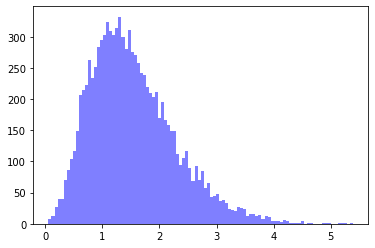

Mean = 1.536833358645989
STD = 0.744260298769052


In [75]:

euclidean_norms = []
for point in gaus_points:
    euclidean_norms.append(np.linalg.norm(point))

plt.hist(euclidean_norms,100, facecolor='blue', alpha=0.5)
plt.show()

print("Mean = {0:.15f}".format(np.mean(euclidean_norms)))
print("STD = {0:.15f}".format(np.std(euclidean_norms)))

### c) Repeating steps a & b for d = (50,100,200,500)

Printing the means and standard deviation of the norms for the given samples.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.


For d = 50
Mean = 9.300141541109500
STD = 1.843257263724779


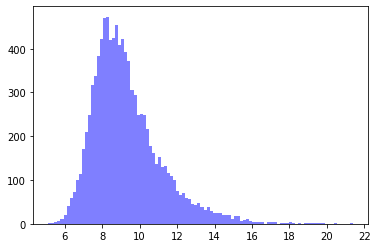

For d = 100
Mean = 14.771196855298893
STD = 2.257459423283563


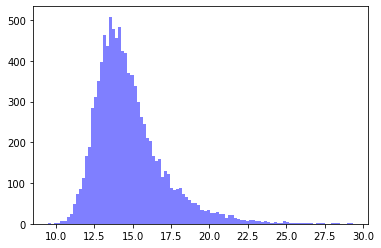

For d = 200
Mean = 24.217600722607024
STD = 2.937383444891754


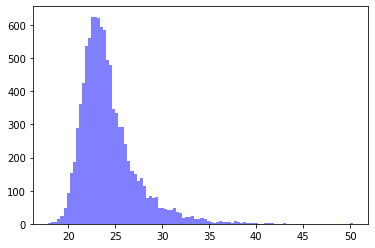

For d = 500
Mean = 46.630190915607436
STD = 3.816795811922018


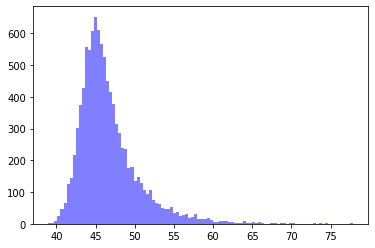

For d = 1000
Mean = 77.097211382851370
STD = 4.507819874905159


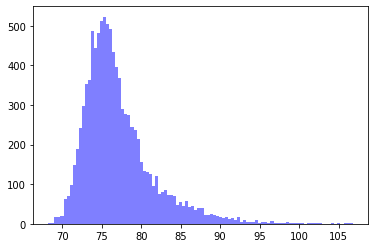

In [78]:
d=[50,100,200,500,1000]
number_of_samples = 10000
gaus_points = {}


for dim in d:
    mean = np.zeros(dim)
    #cov=np.identity(dim)
    cov=get_cov_matrix(dim)
    gaus_points[dim] = np.random.multivariate_normal(mean, cov, (number_of_samples,1))

euclidean_norms=[]
euclidean_norm_means={}
euclidean_norm_std={}
for dim in d:
    for point in gaus_points[dim]:
        euclidean_norms.append(np.linalg.norm(point))
    print("For d = "+str(dim))
    print("Mean = {0:.15f}".format(np.mean(euclidean_norms)))
    print("STD = {0:.15f}".format(np.std(euclidean_norms)))
    plt.hist(euclidean_norms,100, facecolor='blue', alpha=0.5)
    plt.show()
    
    euclidean_norm_means[dim] = np.mean(euclidean_norms)
    euclidean_norm_std[dim]= np.std(euclidean_norms)
    euclidean_norms=[]


    

{50: 9.171359138393301, 100: 14.859766768790305, 200: 24.216139289404868, 500: 46.522484770052266, 1000: 77.21177620462868}


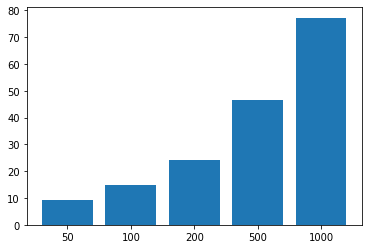

In [76]:
print(euclidean_norm_means)
plt.bar(range(len(euclidean_norm_means)), list(euclidean_norm_means.values()), align='center')
plt.xticks(range(len(euclidean_norm_means)), list(euclidean_norm_means.keys()))
plt.show()

{50: 1.8376085567840326, 100: 2.297531549108044, 200: 2.91988623772001, 500: 3.733928803287355, 1000: 4.680681903041017}


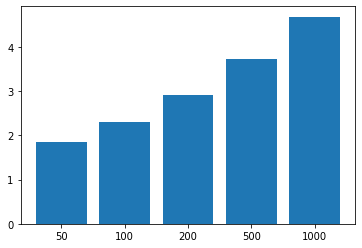

In [77]:
print(euclidean_norm_std)
plt.bar(range(len(euclidean_norm_std)), list(euclidean_norm_std.values()), align='center')
plt.xticks(range(len(euclidean_norm_std)), list(euclidean_norm_std.keys()))
plt.show()

### Conclusion

d) We see that for all the given dimensions the distribution of the euclidean norms are in the range $\mu-2\sigma$ to $\mu+2\sigma$, where $\mu$ is the mean and $\sigma$ the standard deviation. This means that

1. The points we generated were mostly at a mean distance from the origin because all of the plotted euclidean norms(distances) are near the mean. 

2. The mean shifts from the origin (increases) and standard deviation values are comparable as d increases, (are of almost the same magnitude)

3. Given enough sample points from a population if the mean is not different for different samples,i.e. if the mean error is less, like in the case of Gaussian distribution we have a better chance of finding a sample near the mean and that all euclidean norm points are crowded near the mean.  The amount of data needed to estimate the parameters of a multivariate Gaussian distribution to within specified accuracy to a given confidence does not vary with the dimension, all other things being the same. Therefore we may apply any rule of thumb for three dimensions to higher dimensional without any change at all.


